K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Color  Size  Cluster
0      2     3        1
1      1     5        0
2      0     4        2
3      2     2        1
4      1     6        0
5      0     5        2


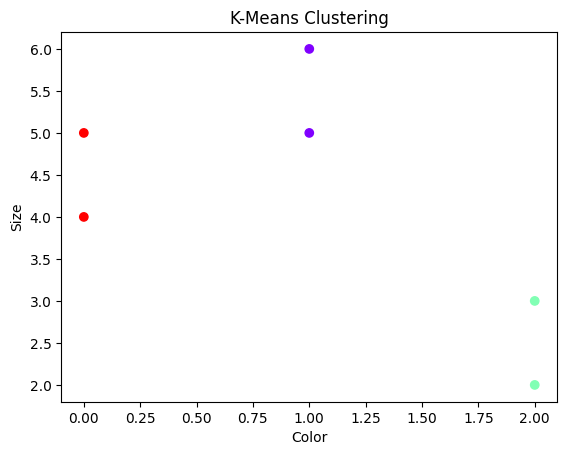

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data (attributes: 'Color' and 'Size')
data = {
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue'],
    'Size': [3, 5, 4, 2, 6, 5]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Encode categorical variables (Color) to numerical values
df['Color'] = df['Color'].astype('category')
df['Color'] = df['Color'].cat.codes

# Combine 'Color' and 'Size' columns into a features array
X = df.values

# Define the number of clusters (K)
num_clusters = 3

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Display the resulting clusters
print(df)

# Visualize the clusters
plt.scatter(df['Color'], df['Size'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Size')
plt.title('K-Means Clustering')
plt.show()

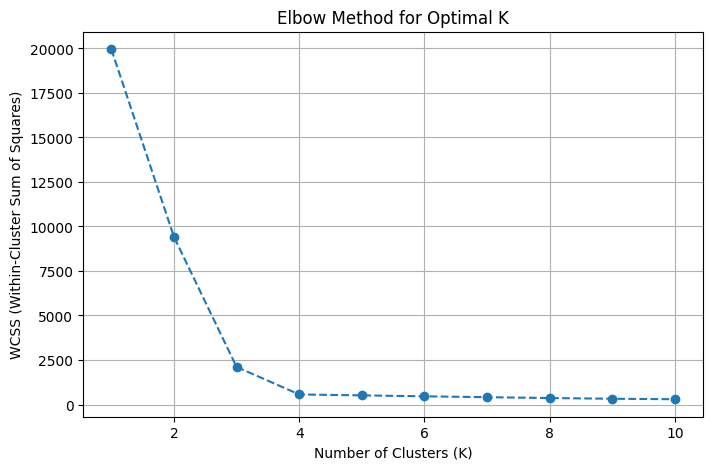

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['X1', 'X2'])

# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


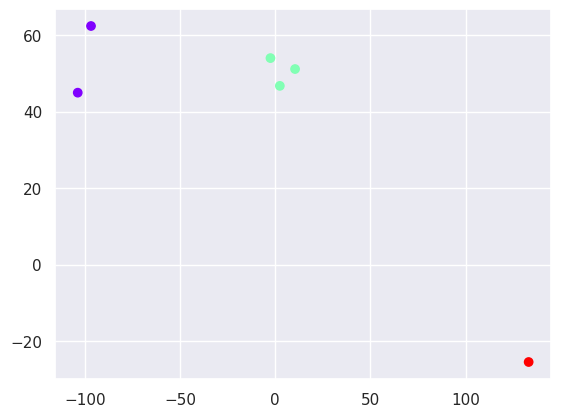

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

# Load the data from a CSV file
data = pd.read_csv('/content/3.01. Country clusters.csv')

# Select the features for clustering (columns 1 and 2)
x = data.iloc[:, 1:3]

# Initialize the K-Means model with 3 clusters
kmeans = KMeans(3)

# Fit the K-Means model to the data and predict cluster assignments
identified_clusters = kmeans.fit_predict(x)

# Create a new DataFrame with cluster assignments
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters

# Scatter plot the data points colored by cluster
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

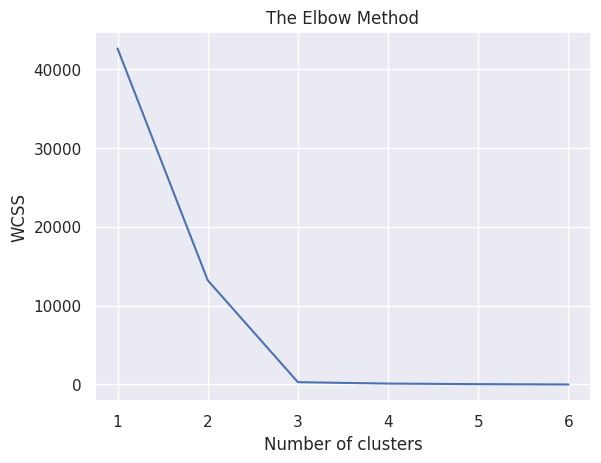

In [ ]:
# Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Plot the Elbow Method graph
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Hierarchical Clustering


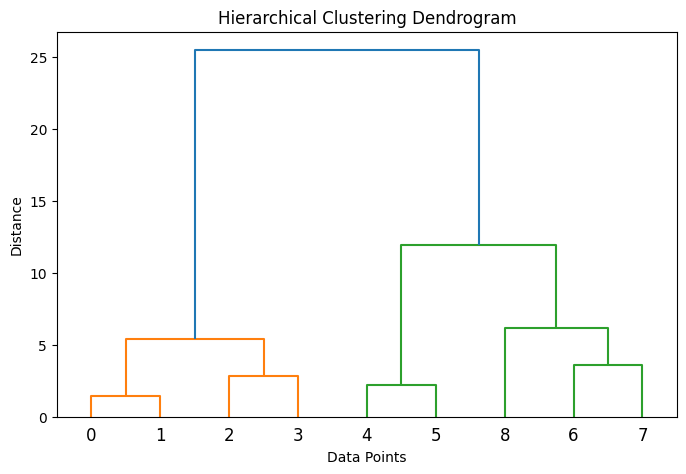

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Sample data
data = {
    'X': [2, 3, 5, 7, 10, 12, 15, 18, 20],
    'Y': [4, 5, 5, 7, 8, 9, 10, 12, 15]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(df, method='ward')

# Create a dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# PCA

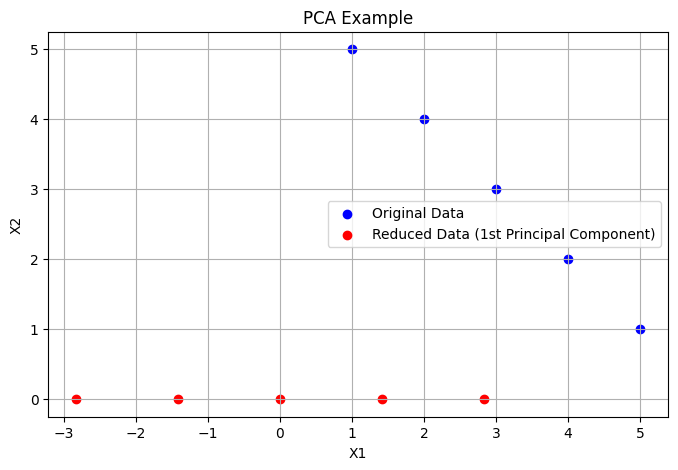

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data
data = {
    'X1': [1, 2, 3, 4, 5],
    'X2': [5, 4, 3, 2, 1],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Initialize PCA with the desired number of components (in this example, 1 component)
pca = PCA(n_components=1)

# Fit and transform the data using PCA
reduced_data = pca.fit_transform(df)

# Create a DataFrame from the reduced data
reduced_df = pd.DataFrame(data=reduced_data, columns=['PC1'])

# Plot the original and reduced data
plt.figure(figsize=(8, 5))
plt.scatter(df['X1'], df['X2'], label='Original Data', color='blue')
plt.scatter(reduced_df['PC1'], [0] * len(reduced_df), label='Reduced Data (1st Principal Component)', color='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('PCA Example')
plt.grid(True)
plt.show()


Apriori

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample transaction dataset
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': [
        ['apple', 'banana', 'cherry'],
        ['banana', 'cherry'],
        ['apple', 'banana', 'cherry'],
        ['apple', 'banana'],
        ['apple', 'cherry'],
    ]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Convert the 'Items' column to a list of strings
df['Items'] = df['Items'].apply(lambda x: ' '.join(x))

# Perform one-hot encoding to represent items as binary values
oht = df['Items'].str.get_dummies(' ')

# Perform Apriori to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.3, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support                 itemsets
0      0.8                  (apple)
1      0.8                 (banana)
2      0.8                 (cherry)
3      0.6          (apple, banana)
4      0.6          (cherry, apple)
5      0.6         (cherry, banana)
6      0.4  (cherry, apple, banana)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
